# Lista 4
Maria Nowacka

In [157]:
import numpy as np, math, matplotlib.pyplot as plt
from scipy.optimize import fsolve

## zadanie 1
Rozwiąż równanie
$$ \tag{1}\tan(\pi - x) - x = 0 $$
Na podstawie uzysaknych wyników wypełnij tabelę 1.

$$\def\arraystretch{1.5}
   \begin{array}{l|l|l|l|l}
   & \text{bisekcja} & \text{m. Brenta} & \text{m. siecznych} & \text{m. Newtona} \\ \hline
x    &          &  &  &  \\
f(x) &          &  &  &  \\
\text{liczba iteracji}     &          &  &  & \\
\text{liczba mnożeń i dodawań}      &          &  &  &
\end{array}$$

**bisekcja**

In [238]:
def bisection(f,x1,x2,switch=1,tol=1.0e-8):
    f1 = f(x1)
    if f1 == 0.0: return x1
    f2 = f(x2)
    if f2 == 0.0: return x2
    if np.sign(f1) == np.sign(f2):
        print('Błędny przedział izolacji pierwiastka!')
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
    num_op = 6
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        num_op += 4
        if (switch == 1) and (abs(f3) > abs(f1)) and (abs(f3) > abs(f2)):
            return None
        if f3 == 0.0: return x3
        if np.sign(f2)!= np.sign(f3): x1 = x3; f1 = f3
        else: x2 = x3; f2 = f3
    wynik = (x1 + x2)/2.0
    return wynik, f(wynik), i+1, num_op+2


In [248]:
def fun(x): return np.tan(np.pi - x) - x

In [278]:
x,fx, i,n = bisection(fun, 1.7, 2.8)
print(f'x = {x}, \nf(x) = {fx}, \ni = {i}, \ndodawania i mnożenia = {n}')

x = 2.028757837042213, 
f(x) = 6.53308918074913e-09, 
i = 27, 
dodawania i mnożenia = 116


**m. Brenta**

In [241]:
def brent(f, a, b, tol=1.0e-9):
    fa = f(a)
    fb = f(b)
    num_op = 4
    if fa == 0.0: return a
    if fb == 0.0: return b
    if np.sign(fa) == np.sign(fb):
        print('Błędny przedział izolacji pierwiastka!')
        return None
    c = a
    fc = fa
    i = 1
    while abs(b - a) > tol:
        i += 1
        if (fa != fc) and (fb != fc):
            s = a*fb*fc / ((fa - fb)*(fa - fc)) + b*fa*fc / ((fb - fa)*(fb - fc)) + c*fa*fb / ((fc - fa)*(fc - fb))
            num_op += 20
        else:
            s = b - fb * (b - a) / (fb - fa)
            num_op += 5
        if not (a < s < b):
            s = (a + b) / 2.0
            num_op += 2
        fs = f(s)
        num_op += 2
        c = b
        fc = fb
        if np.sign(fa) == np.sign(fs):
            a = s
            fa = fs
        else:
            b = s
            fb = fs
        if abs(b - a) < tol:
            num_op += 1
            return s, i, f(s), num_op

    return (a + b) / 2.0, i, f((a + b) / 2.0), num_op +2

In [279]:
x, i, fx, n = brent(fun, 1.7, 2.8, tol = 1.0e-4)
print(f'x = {x}, \nf(x) = {fx}, \ni = {i}, \ndodawania i mnożenia = {n}')

x = 2.0287578390608076, 
f(x) = -5.812349712641662e-09, 
i = 8, 
dodawania i mnożenia = 99


**m. siecznych**

In [232]:
def sieczne(f, a, b, tol=1.0e-9, max_it = 1000):
    fa = f(a)
    fb = f(b)
    num_op = 4
    if fa == 0.0: return a
    if fb == 0.0: return b
    if np.sign(fa) == np.sign(fb):
        print('Błędny przedział izolacji pierwiastka!')
        return None
    xs = a
    fxs = f(xs)
    num_op += 2
    x = a - fa / (fb-fa) * (b-a)
    fx = f(x)
    i = 1
    num_op += 7
    for i in range(max_it):
      temp, ftemp = x.copy(), fx.copy()
      x -= fx * (x - xs) /(fx - fxs)
      fx = f(x)
      xs, fxs = temp, ftemp
      num_op += 7

      if abs(fx) < tol:
        return x, fx, i, num_op
      i += 1
    return x, fx, i, num_op


In [280]:
x, fx, i, n = sieczne(fun, 1.7, 2.8, tol = 1.0e-4)
print(f'x = {x}, \nf(x) = {fx}, \ni = {i}, \ndodawania i mnożenia = {n}')

x = 2.0287579776101743, 
f(x) = -8.531604507311386e-07, 
i = 6, 
dodawania i mnożenia = 62


**m. Newtona**

In [236]:
def newton(f,Df,x0,epsilon,maxit):
    xn = x0
    i = 1
    num_op = 0
    for n in range(0,maxit):
        fxn = f(xn)
        num_op += 2
        if abs(fxn) < epsilon:
            return xn, n, fxn, num_op
        Dfxn = Df(xn)
        num_op += 4
        if Dfxn == 0.0:
            print('Zero derivative. No solution found.')
            return None
        xn -= fxn/Dfxn
        num_op += 2
    print('Exceeded maximum iterations. No solution found.')
    return None

In [281]:
Df = lambda x: -1/np.cos(np.pi - x)**2 - 1
x, i, fx, n = newton(fun,Df,2,1e-16,10)
print(f'x = {x}, \nf(x) = {fx}, \ni = {i}, \ndodawania i mnożenia = {n}')

x = 2.028757838110434, 
f(x) = 0.0, 
i = 4, 
dodawania i mnożenia = 34


$$\def\arraystretch{1.5}
   \begin{array}{|c|c|c|c|c|} \hline
   & \text{bisekcja} & \text{m. Brenta} & \text{m. siecznych} & \text{m. Newtona} \\ \hline
x    & 2.0288 & 2.0288 & 2.0288, & 2.0288 \\
f(x) & 6.5331e-09 & -5.8123e-09 & -8.5316e-07 & 0.0 \\
\text{liczba iteracji} & 27 & 8 & 6 & 4 \\
\text{liczba mnożeń i dodawań} & 116 & 99 & 62 & 34 \\ \hline
\end{array}$$

In [250]:
x = fsolve(fun, 1.7)
print(f"Rozwiązanie funkcją wbudowaną fsolve: \nx = {x}")

Rozwiązanie funkcją wbudowaną fsolve: 
x = [2.02875784]


## zadanie 2
 Sporządź wykres funkcji $f(x) = \cosh{x} \cos{x}−1$ w przedziale $4 \leq x \leq 8$. Na
podstawie wykresu sprawdź, że najmniejszy dodatni pierwiastek równania
$f(x) = 0$ leży w przedziale $(4, 5)$, a następnie pokaż, że iteracyjny wzór
Newtona nie doprowadzi do tego pierwiastka, jeśli punktem startowym
będzie $x_0 = 4$.

In [60]:
def fun2(x):
  return np.cosh(x)*np.cos(x) - 1

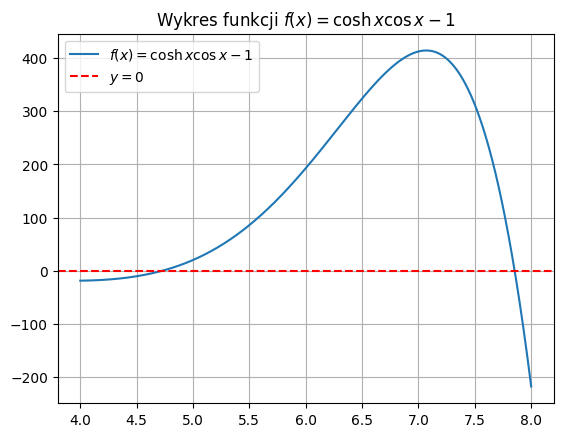

In [71]:
xs = np.linspace(4,8,1000)
ys = fun2(xs)
plt.plot(xs,ys,label = "$f(x) = \cosh{x} \cos{x}−1$")
plt.axhline(y=0, linestyle = "--", color = 'red', label = "$y = 0$")
plt.title("Wykres funkcji $f(x) = \cosh{x} \cos{x}−1$")
plt.grid()
plt.legend()
plt.show()

In [104]:
def newton_iter(f,Df,x0,tol = 1e-6,maxit = 100):
    for i in range(0,maxit):
        fx0 = f(x0)
        Dfx0 = Df(x0)
        if Dfx0 < 1e-10:
          raise ValueError('Pochodna bliska zeru. Nie znaleziono rozwiązania')
        x1 = x0 - fx0 / Dfx0
        if abs(x1 - x0) < tol:
          return x1
        x0 = x1
    raise ValueError('Osiągnięto maksimum iteracji. Nie znaleziono rozwiązania')

In [256]:
Df2 = lambda x: np.sinh(x)*np.cos(x) - np.cosh(x)*np.sin(x)
x = newton(fun2, Df2, 4, 1e-6, 100)[0]
x, fun2(x)

(10.995607838002249, 1.7219616621488854e-08)

In [257]:
x = fsolve(fun2, 4)
print(f"Rozwiązanie funkcją wbudowaną fsolve: \nx = {x}")

Rozwiązanie funkcją wbudowaną fsolve: 
x = [4.73004074]


## zadanie 3
Prędkość v rakiety Saturn V w locie pionowym tuż przy powierzchni Ziemi
można przybliżyć wzorem
$$\tag{2}v = u \ln{ \frac{M_0}{
M_0 − mt}} − gt,$$
gdzie \\
$\quad$  • $u = 2510\ \frac{m}{s}$ - prędkość spalin względem rakiety, \\
$\quad$  • $M_0 = 2, 8 × 10^6\ \text{kg}$ -masa rakiety w momencie oderwania od Ziemi, \\
$\quad$  • $m = 13, 3 × 10^3 \frac{\text{kg}}{s} $- szybkość zużycia paliwa, \\
$\quad$  • $g = 9, 81 \frac{m}{s^2}$ - przyspieszenie ziemskie, \\
$\quad$  • $t$ - czas mierzony od oderwania od Ziemi. \\
Wyznacz czas, po jakim rakieta osiągnie prędkość dźwięku ($335 \frac{m}{s}$).

In [ ]:
u = 2510  # m/s
M0 = 2.8e6  # kg
m_dot = 13.3e3  # kg/s
g = 9.81  # m/s^2
v_sound = 335  # m/s

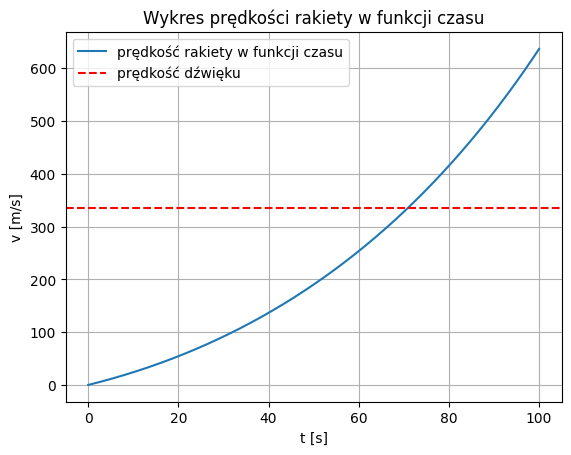

In [284]:
xs = np.linspace(0,100,1000)
ys = u*np.log(M0/(M0 - m_dot*xs)) - g*xs
plt.plot(xs, ys, label = "prędkość rakiety w funkcji czasu")
plt.axhline(y=v_sound, linestyle = "--", color = 'red', label = "prędkość dźwięku")
plt.title("Wykres prędkości rakiety w funkcji czasu")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.legend()
plt.show()

In [127]:
def v(t, u = u, M0 = M0, m = m_dot, g = g):
  return u*np.log(M0/(M0 - m*t)) - g*t

In [128]:
def v_prime(t, u = u, M0 = M0, m = m_dot, g = g):
  return -u*m/(M0 - m*t) - g

In [129]:
def v_equation(t, v_sound = v_sound):
  return v(t) - v_sound

In [131]:
t,_,_,_ = bisection(v_equation, 50, 100)
t, v(t)

(70.87797226813564, 335.0000000004454)

In [262]:
x = fsolve(v_equation, 60) # punkt początkowy wybieramy na podstawie wykresu
print(f"Rozwiązanie funkcją wbudowaną fsolve: \nx = {x}")

Rozwiązanie funkcją wbudowaną fsolve: 
x = [70.87797227]


## zadanie 4
$ G = -RT \ln\left[ \left(\frac{T}{T_0} \right)^{5/2}\right], $

gdzie $ R = 8.31441\ \frac{\text{J}}{\text{K}} $ to stała gazowa, a $T_0 = 4.44418\ \text{K}$. Wyznacz
temperaturę, w której $G = −10^5 \text{J}$.


In [143]:
R = 8.31441 # J/K
T0 = 4.44418 # K
G_target = -1e5 # J

In [134]:
def G(T, R = R, T0 = T0):
  return -R*T*np.log((T/T0)**(5/2))

In [144]:
def G_eq(T):
  return G(T, R, T0) - G_target

<ipython-input-134-6ea6ed9c7670>:2: RuntimeWarning: divide by zero encountered in log
  return -R*T*np.log((T/T0)**(5/2))
<ipython-input-134-6ea6ed9c7670>:2: RuntimeWarning: invalid value encountered in multiply
  return -R*T*np.log((T/T0)**(5/2))


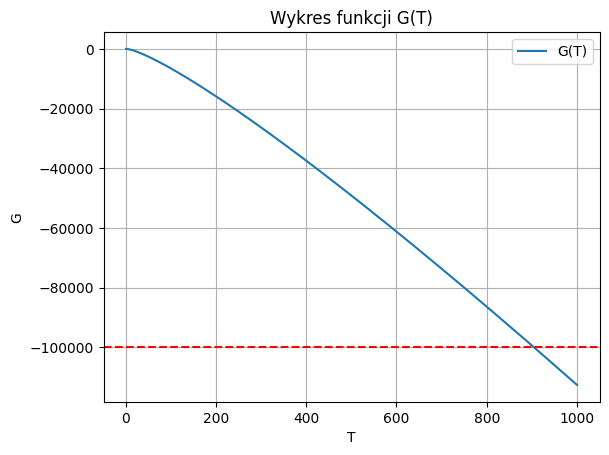

In [283]:
xs = np.linspace(0,1000,1000)
ys = G(xs)
plt.plot(xs, ys, label = "G(T)")
plt.axhline(y = G_target, color = 'red', ls='--')
plt.title("Wykres funkcji G(T)")
plt.grid()
plt.xlabel("T")
plt.ylabel("G")
plt.legend()
plt.show()

In [149]:
T, _, _, _ = bisection(G_eq, 800, 1000)
T, G(T)

(904.942583232696, -99999.99999997579)

In [263]:
x = fsolve(G_eq, 800) # punkt początkowy wybieramy na podstawie wykresu
print(f"Rozwiązanie funkcją wbudowaną fsolve: \nx = {x}")

Rozwiązanie funkcją wbudowaną fsolve: 
x = [904.94258323]


## zadanie 5
Korzystając z dowolnej metody wyznacz wszystkie rozwiązania rzeczywiste układu równań
$$ \tag{4}\begin{align}
\tan{x} − y &= 1, \\
\cos{x} − 3 \sin{y} &= 0,
\end{align}$$
w przedziale $(0; 1, 5)$.



In [152]:
def equations(var):
  x, y = var
  return [np.tan(x) - y - 1, np.cos(x) - 3*np.sin(y)]

In [154]:
def solve_system(equations, initial_guess, tol=1e-7, max_iter=100):
    x, y = initial_guess
    for _ in range(max_iter):
        f1, f2 = equations([x, y])
        J = np.array([                  # macierz Jacobiego (pochodne)
            [1 / np.cos(x)**2, -1],
            [-np.sin(x), -3 * np.cos(y)]
        ])
        delta = np.linalg.solve(J, [-f1, -f2])
        x, y = x + delta[0], y + delta[1]
        if np.linalg.norm(delta) < tol:
            return x, y
    raise ValueError("Maximum iterations exceeded.")

In [155]:
x, y = solve_system(equations, [0.5, 0.5])
x, y

(0.8815925944959484, 0.2135947145716605)

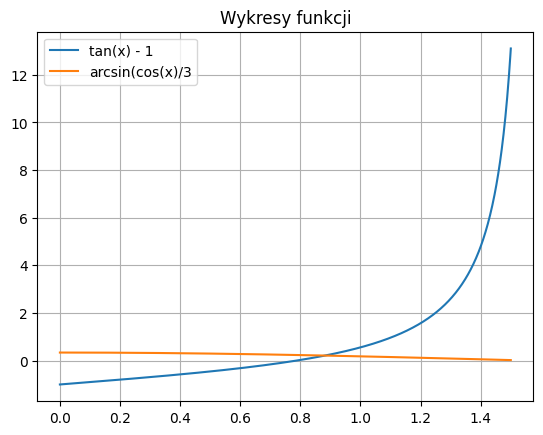

In [266]:
xs = np.linspace(0, 1.5, 1000)
ys1 = np.tan(xs) - 1
ys2 = np.arcsin(np.cos(xs)/3)
plt.plot(xs, ys1, label = "tan(x) - 1")
plt.plot(xs, ys2, label = "arcsin(cos(x)/3")
plt.grid()
plt.title("Wykresy funkcji")
plt.legend()
plt.show()


In [265]:
x, y = fsolve(equations, [0.5, 0.0]) # punkt początkowy wybieramy na podstawie wykresu
print(f"Rozwiązanie funkcją wbudowaną fsolve: \nx = {x, y}")

Rozwiązanie funkcją wbudowaną fsolve: 
x = (0.8815925944959473, 0.21359471457166046)


## zadanie 6
 Znajdź wszystkie pierwiastki wielomianu
$$ \tag{5} w(x) = x^4 + (5 + i)x^3 − (8 − 5i)x^2 + (30 − 14i)x − 84.$$

In [163]:
def w(x):
  return x**4 + (5+1j)*x**3 - (8-5j)*x**2 + (30-14j)*x - 84

In [218]:
def process_coefficients(coefficients, threshold=1e-5, decimal_places=1):
    processed_coeffs = []
    for coeff in coefficients:
        # Jeżeli wartość jest mniejsza niż threshold, traktujemy ją jako zero
        if abs(coeff) < threshold:
            processed_coeffs.append(0)
        else:
            # Jeśli współczynnik jest liczbą zespoloną
            if isinstance(coeff, complex):
                real_part = round(coeff.real, decimal_places)
                imag_part = round(coeff.imag, decimal_places)
                processed_coeffs.append(complex(real_part, imag_part))
            else:
                # Zaokrąglamy liczbę rzeczywistą
                processed_coeffs.append(round(coeff, decimal_places))

    return processed_coeffs


In [219]:
import cmath
from random import random

def evalPoly(a,x):
    n = len(a) - 1
    p = a[n]
    dp = 0.0 + 0.0j
    ddp = 0.0 + 0.0j
    for i in range(1,n+1):
        ddp = ddp*x + 2.0*dp
        dp = dp*x + p
        p = p*x + a[n-i]
    return p,dp,ddp

def polyRoots(a,tol=1.0e-12):

    def laguerre(a,tol):
        x = random() # Starting value (random number)
        n = len(a) - 1

        for i in range(30):
            p,dp,ddp = evalPoly(a,x)
            if abs(p) < tol:
                return x
            g = dp/p
            h = g*g - ddp/p
            f = cmath.sqrt((n - 1)*(n*h - g*g))
            if abs(g + f) > abs(g - f):
                dx = n/(g + f)
            else:
                dx = n/(g - f)
            x = x - dx
            if abs(dx) < tol:
                return x
        print('Too many iterations')


    def deflPoly(a,root):
        # Deflates a polynomial
        n = len(a)-1
        b = [(0.0 + 0.0j)]*n
        b[n-1] = a[n]
        for i in range(n-2,-1,-1):
            b[i] = a[i+1] + root*b[i+1]
        return b


    n = len(a) - 1
    roots = np.zeros((n),dtype=complex)
    for i in range(n):
        x = laguerre(a,tol)
        if abs(x.imag) < tol: x = x.real
        roots[i] = x
        a = deflPoly(a,x)
    return roots

In [277]:
c = np.array([-84.0, 30.0-14.0j, -8.0+5.0j, (5.0+1.0j), 1.0])
roots2 = polyRoots(c)
print('Pierwiastki tego wielomianu to:\n',roots2)
processed_coefficients2 = process_coefficients(roots2)
print(f"pierwiastki zaokrąglone:\n{processed_coefficients2}")

Pierwiastki tego wielomianu to:
 [ 2.00000000e+00+0.j  9.72685203e-16+2.j  0.00000000e+00-3.j
 -7.00000000e+00+0.j]
pierwiastki zaokrąglone:
[(2+0j), 2j, -3j, (-7+0j)]


In [276]:
roots_solve = np.roots(c[::-1])
print(f"Rozwiązanie funkcją wbudowaną roots: \npierwiastki: {roots_solve}")
print(f"Zaokrąglone rozwiązanie funkcją wbudowaną roots: \n{process_coefficients(roots_solve)}")

Rozwiązanie funkcją wbudowaną roots: 
pierwiastki: [-7.00000000e+00+0.00000000e+00j -7.53578532e-16-3.00000000e+00j
  2.00000000e+00+7.53147208e-16j  2.99582890e-16+2.00000000e+00j]
Zaokrąglone rozwiązanie funkcją wbudowaną roots: 
[(-7+0j), (-0-3j), (2+0j), 2j]


Pierwiastki obliczone przez WolframAlpha: \\
`2, 2i, -3i, -7`
